# **Consumer Behavior and Shopping Habits**

**Context:**
The Consumer Behavior and Shopping Habits Dataset provides comprehensive insights into consumers' preferences, tendencies, and patterns during their shopping experiences. This dataset encompasses a diverse range of variables, including demographic information, purchase history, product preferences, shopping frequency, and online/offline shopping behavior. With this rich collection of data, analysts and researchers can delve into the intricacies of consumer decision-making processes, aiding businesses in crafting targeted marketing strategies, optimizing product offerings, and enhancing overall customer satisfaction.

**Content:**
The Consumer Behavior and Shopping Habits Dataset provides a detailed overview of consumer preferences and purchasing behaviors. It includes demographic information, purchase history, product preferences, and preferred shopping channels (online or offline). This dataset is essential for businesses aiming to tailor their strategies to meet customer needs and enhance their shopping experience, ultimately driving sales and loyalty.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("shopping_trends.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.shape

(3900, 19)

In [ ]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
print(df.apply(lambda col: col.unique())) #displays unique values for each coloumn


Customer ID                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Age                         [55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 3...
Gender                                                         [Male, Female]
Item Purchased              [Blouse, Sweater, Jeans, Sandals, Sneakers, Sh...
Category                         [Clothing, Footwear, Outerwear, Accessories]
Purchase Amount (USD)       [53, 64, 73, 90, 49, 20, 85, 34, 97, 31, 68, 7...
Location                    [Kentucky, Maine, Massachusetts, Rhode Island,...
Size                                                            [L, S, M, XL]
Color                       [Gray, Maroon, Turquoise, White, Charcoal, Sil...
Season                                         [Winter, Spring, Summer, Fall]
Review Rating               [3.1, 3.5, 2.7, 2.9, 3.2, 2.6, 4.8, 4.1, 4.9, ...
Subscription Status                                                 [Yes, No]
Payment Method              [Credit Card, Bank Transfer, Cash, P

In [ ]:
#Finding Numerical Columns
num_col=[]
for col in df.columns:
    if(df[col].dtypes!='object'):
        num_col.append(col)
print(f"There are total {len(num_col)} numerical columns in dataset")
print(num_col)

There are total 5 numerical columns in dataset
['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']


In [ ]:
#Finding Categorical Columns
cat_col=[]
for col  in df.columns:
    if(df[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} categorical columns in dataset")
print(cat_col)

There are total 14 categorical columns in dataset
['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']


In [ ]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# Exploratory Data Analysis

In [ ]:
# Number of Purchases in Each Location
location_counts = df['Location'].value_counts()

# Converting the Series to a DataFrame for visualization
location_df = location_counts.reset_index()
location_df.columns = ['Location', 'Number of Purchases']

# To enhance storytelling, sort the locations by the number of purchases
fig = px.bar(location_df.sort_values('Number of Purchases', ascending=True),
             x='Number of Purchases',
             y='Location',
             orientation='h',
             title='Number of Purchases in Each Location',
             hover_data=['Location', 'Number of Purchases'],
             color='Number of Purchases',  # Apply color based on the number of purchases
             color_continuous_scale=px.colors.sequential.Viridis)  # Use a perceptually uniform color scale

# Add interactivity through hover effects and a clear layout
fig.update_layout(
    title={
        'text': 'Number of Purchases in Each Location',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    yaxis={'categoryorder': 'total ascending'},
    xaxis_title='Number of Purchases',
    yaxis_title='Location',
    template='plotly_white',  # Use a clean and minimal template
    hovermode='closest'  # Highlight the closest bar on hover for better user interaction
)

# Adjust the colorbar to match the design aesthetics
fig.update_coloraxes(colorbar_title='Purchases Count')

# Display the interactive plot
fig.show()

The Horizontal Bar Chart visually illustrates the distribution of purchase counts across various states in the United States. Montana stands out as having the highest number of purchases, with a purchase count of 96. On the other hand, Kansas and Rhode Island have the lowest number of purchases, both registering a purchase count of 63.

In [ ]:
# Category-Wise Purchases for Each Location
category_counts = df.groupby("Location")["Category"].value_counts()

# Converting the Series to a DataFrame for Plotly visualization
category_counts_df = category_counts.reset_index(name='Count')
category_counts_df.columns = ['Location', 'Category', 'Count']

# Apply a distinct color scale for categories and adjust hover template for better readability
fig = px.bar(category_counts_df,
             x='Location',
             y='Count',
             color='Category',
             title='Category-Wise Purchases for Each Location',
             hover_data=['Location', 'Category', 'Count'],
             color_discrete_sequence=px.colors.qualitative.Set2)  # Use a qualitative color scale

# Configure the layout to emphasize category distinctions and interactive engagement
fig.update_layout(
    title={
        'text': 'Category-Wise Purchases for Each Location',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Location',
    yaxis_title='Number of Purchases',
    barmode='stack',
    xaxis={'categoryorder':'total descending'},
    template='plotly_white'  # Use a clean and minimal template
)

# Enhance hover interaction
fig.update_traces(hovertemplate='Location: %{x}<br>Category: %{marker.color}<br>Count: %{y}')

# Display the interactive plot
fig.show()

The Vertical Stacked Bar Chart visually illustrates the distribution of the number of purchases across various states in the United States for four categories: Clothing, Accessories, Footwear, and Outerwear.

In terms of Clothing purchases, California leads with the highest count of 47, while Iowa has the least with a count of 23. For Accessories, Nebraska has the highest count of 37, and Kansas has the least with a count of 17. In the Footwear category, Ohio has the highest count of 18, and Kentucky has the least with a count of 5. Lastly, for Outerwear purchases, North Dakota has the highest count of 14, whereas Georgia has the least with a count of 1.

In [ ]:
import plotly.express as px

# Define a consistent color palette
color_palette = px.colors.qualitative.Pastel

# Categorize the 'Age' data into ranges for the pie chart
bins = [0, 18, 35, 50, 65, 80, 100]  # Example age bins
labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '81-100']  # Corresponding labels for the age bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Gender Distribution
gender_counts = df['Gender'].value_counts()
fig_gender = px.pie(gender_counts, values='Gender', names=gender_counts.index, title='Gender Distribution of Customers', color_discrete_sequence=color_palette)
fig_gender.update_traces(textinfo='percent+label', pull=[0.1 if i == 0 else 0 for i in range(len(gender_counts))])  # Pull out the largest segment for emphasis
fig_gender.update_layout(title_x=0.5)

# Distribution of Shipping Preferences
shipping_counts = df['Shipping Type'].value_counts()
fig_shipping_pref = px.pie(shipping_counts, values='Shipping Type', names=shipping_counts.index, title='Distribution of Shipping Preferences', color_discrete_sequence=px.colors.sequential.RdBu)  # Use a sequential color scale
fig_shipping_pref.update_traces(textinfo='percent+label', pull=[0.1 if i == 0 else 0 for i in range(len(shipping_counts))])  # Pull out the largest segment for emphasis
fig_shipping_pref.update_layout(title_x=0.5, legend_title_text='Shipping Type')

# Age Distribution
age_group_counts = df['Age Group'].value_counts()
fig_age_distribution = px.pie(age_group_counts, values='Age Group', names=age_group_counts.index, title='Age Distribution of Customers', color_discrete_sequence=color_palette)
fig_age_distribution.update_traces(textinfo='percent+label', pull=[0.1 if i == age_group_counts.idxmax() else 0 for i in range(len(age_group_counts))])  # Pull out the largest segment for emphasis
fig_age_distribution.update_layout(title_x=0.5)

# Show the plots
fig_gender.show()
fig_shipping_pref.show()
fig_age_distribution.show()


The initial Pie Chart illustrates the gender distribution among customers, with 32% being female and 68% being male.

The second Pie Chart showcases the distribution of shipping preferences. Free shipping holds the highest percentage at 17.3%, followed by Standard at 16.8%, Store pickup at 16.7%, Next Day Air at 16.6%, Express at 16.6%, and 2-Day Shipping at 16.1%.

The third Pie Chart delves into the age distribution of customers. For individuals aged 19 to 35, the percentage is 31.8%. From age 36 to 50, it's 28.2%. In the age group of 51 to 65, it's 29%. For those aged 66 to 80, the percentage is 10.9%. Notably, the age categories of 0 to 18 and 81 to 100 both have a representation of 0%.

In [ ]:
# Define a consistent and sophisticated color palette
color_palette = px.colors.qualitative.Vivid

# Create a 2x2 subplot grid
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    'Distribution of Review Ratings',
    'Top 10 Most Purchased Items',
    'Frequency of Purchases',
    'Payment Methods'
))

# Review Rating Distribution
counts, bins = np.histogram(df['Review Rating'], bins=range(1, 7))
fig.add_trace(go.Bar(
    x=bins[:-1],
    y=counts,
    marker=dict(color=color_palette[2], line=dict(color='DarkSlateGrey', width=2)),
    text=counts,
    textposition='inside',
), row=1, col=1)

# Top 10 Most Purchased Items
top_items = df['Item Purchased'].value_counts().head(10).reset_index()
fig.add_trace(go.Bar(
    x=top_items['index'],
    y=top_items['Item Purchased'],
    marker=dict(color=color_palette[3], line=dict(color='DarkSlateGrey', width=2)),
    text=top_items['Item Purchased'],
    textposition='inside',
), row=1, col=2)

# Frequency of Purchases
frequency_counts = df['Frequency of Purchases'].value_counts().reset_index()
fig.add_trace(go.Bar(
    x=frequency_counts['index'],
    y=frequency_counts['Frequency of Purchases'],
    marker=dict(color=color_palette[4], line=dict(color='DarkSlateGrey', width=2)),
    text=frequency_counts['Frequency of Purchases'],
    textposition='inside',
), row=2, col=1)

# Payment Method Preference
payment_method_counts = df['Payment Method'].value_counts().reset_index()
fig.add_trace(go.Bar(
    x=payment_method_counts['index'],
    y=payment_method_counts['Payment Method'],
    marker=dict(color=color_palette[5], line=dict(color='DarkSlateGrey', width=2)),
    text=payment_method_counts['Payment Method'],
    textposition='inside',
), row=2, col=2)

# Update layout
fig.update_layout(
    title_text='Customer Behavior Visualizations',
    title_x=0.5,
    title_font_size=20,
    font=dict(family="Arial, sans-serif", size=12, color="RebeccaPurple"),
    showlegend=False,
    template='plotly_white'
)

# Show the plots
fig.show()

The Histogram serves as a visual representation of customer behavior, encompassing visualizations for the Distribution of Review Ratings, Top 10 Most Purchased Items, Frequency of Purchases, and Payment Methods.

In the Distribution of Review Ratings graph, a rating of 4 receives the maximum count at 1576, while the minimum rating is 1 with a count of 0.

Within the Top 10 Most Purchased Items graph, Blouse, Jewelry, and Pants are the most frequently purchased items, each with an equal count of 171. Conversely, Belt, Sunglasses, and Coat are the least purchased, each with an equal count of 161.

The Frequency of Purchases graph indicates that the maximum count occurs with purchases made every 3 months, totaling 584, while the minimum count is associated with weekly purchases, amounting to 539.

In the Payment Methods graph, the maximum payment method used is credit card, with a count of 696. Debit card follows closely with 633 counts, and bank transfer is nearly equal with 632 counts, suggesting a relatively balanced usage of these payment methods.


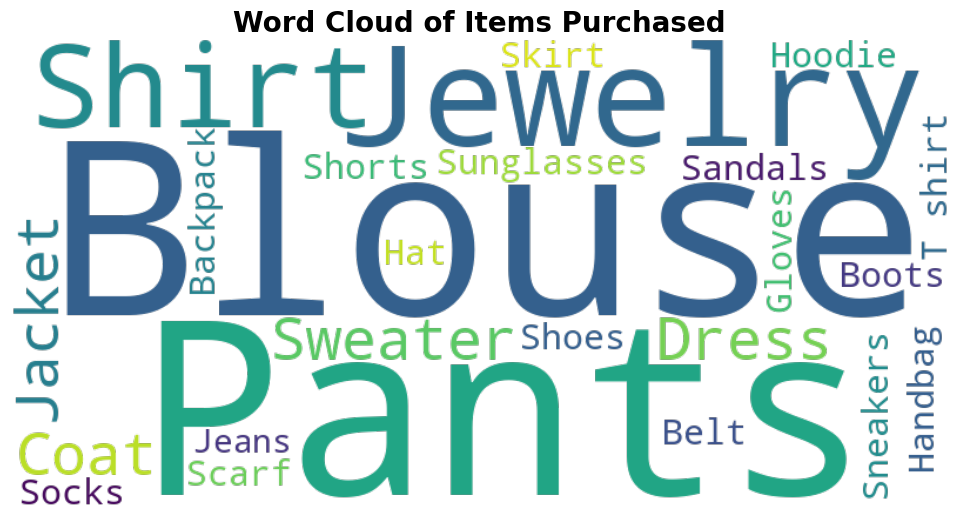

In [ ]:
# Join all the items in the 'Item Purchased' column to form a large string
text = ' '.join(item for item in df['Item Purchased'])

# Create the word cloud object with additional design parameters
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color=None,  # No background
    mode='RGBA',            # Necessary to save image with no background
    colormap='viridis',     # A colormap with bright colors for good visibility
    max_words=150,          # Limit the number of words to avoid clutter
    contour_width=3,        # Adds a contour width to the words for emphasis
    contour_color='yellow'  # Contour color that stands out
).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5), facecolor=None)  # No facecolor for transparency
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Items Purchased', fontsize=20, color='black', weight='bold')  # Visible title
plt.axis("off")
plt.tight_layout(pad=0)

# Save the figure with a transparent background
wordcloud_image_path = 'wordcloud.png'  # Replace with your desired path
plt.savefig(wordcloud_image_path, format='png', transparent=True)

# Show the plot if you want to view it in a Python environment like Jupyter
plt.show()

The Word Cloud serves as a visual representation of the items being purchased. In this representation, words with a larger or bolder font size indicate that these items are being purchased in greater quantities compared to others. Notably, "Blouse," "Pants," "Jewelry," and "Shirt" are displayed with a larger font size, suggesting a higher frequency of purchases for these items. Conversely, items such as "Sunglasses," "Jeans," "Gloves," and others are depicted with a smaller font size, indicating a comparatively lower frequency of purchase for these items.


In [ ]:
# Create a Violin Plot of Review Rating by Category
fig = px.violin(df, y='Review Rating', x='Category', color='Category',
                box=True,  # Display box plot inside the violin
                points="all",  # Show all points
                hover_data=df.columns)  # Show all columns in hover data

# Enhance the plot with titles and axis labels using design principles
fig.update_layout(
    title="Violin Plot of Review Rating by Category",
    title_x=0.5,  # Center the title
    title_font=dict(size=20, color='blue', family="Arial, sans-serif"),  # Stylish title
    xaxis_title="Category",
    yaxis_title="Review Rating",
    xaxis=dict(showgrid=False),  # Remove gridlines for x-axis for better visual appeal
    yaxis=dict(showgrid=True),  # Keep gridlines for y-axis for precision reading
    paper_bgcolor='rgb(243, 243, 243)',  # Light background color for the plot
    plot_bgcolor='rgb(243, 243, 243)',  # Consistent with paper background
)

# Show the figure
fig.show()

The violin plot serves as a graphical representation of review ratings categorized by product type. In this visualization, the median review rating for footwear, outerwear, and accessories collectively stands at 3.8, indicating a consistent and relatively high level of satisfaction across these categories. On the other hand, the median review rating for clothing is slightly lower at 3.7. This suggests that, on average, customers tend to assign slightly lower ratings to clothing items compared to footwear, outerwear, and accessories. The violin plot provides a nuanced and detailed view of the distribution of review ratings, allowing for a more comprehensive understanding of customer satisfaction within each product category.


In [ ]:
fig = px.bar(
    df,
    x='Category',
    y='Purchase Amount (USD)',
    color='Gender',
    title='Purchase Amount by Category and Gender',
    labels={'Purchase Amount (USD)': 'Purchase Amount', 'Category': 'Category'},
    barmode='group',
    color_discrete_map={'Male': 'cyan', 'Female': 'hotpink'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Product Category',
    yaxis_title='Average Purchase Amount (USD)',
    legend_title='Gender',
    # Set the plot background to a medium dark shade
    plot_bgcolor='rgba(120, 120, 120, 1)',  # Medium dark grey for the plot background
    paper_bgcolor='rgba(100, 100, 100, 1)',  # Slightly darker grey for the overall paper background
)

fig.update_traces(
    hoverinfo='y+name',
    hovertemplate="<b>%{x}</b><br>Purchase Amount: $%{y:.2f}<extra>%{name}</extra>"
)

# Improve typography and layout
fig.update_layout(
    title={'text': 'Purchase Amount by Category and Gender', 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="Black"
    )
)

# Add a hover label with high contrast
fig.update_traces(hoverlabel=dict(bgcolor="white", font_size=14, font_family="Rockwell"))

# Show the figure
fig.show()

The bar chart analysis indicates a discernible trend, revealing that males have exhibited a comparatively higher level of expenditure across all categories in comparison to females. This observation suggests that, on average, male customers have allocated a greater financial commitment to purchases within each respective category. The findings from the bar chart underscore a notable gender-based distinction in spending patterns, emphasizing the likelihood that males have demonstrated a propensity for higher expenditures across the entire range of product categories examined.


In [ ]:
import plotly.express as px

# Assuming 'df' is your DataFrame and it has the 'Season' column
fig = px.histogram(
    df,
    x='Season',
    title='Purchase Count by Season',
    labels={'Season': 'Season', 'count': 'Number of Purchases'},
    text_auto=True,  # Automatically add text with count information
    color='Season',  # Use the 'Season' column to color the bars for better visual distinction
    pattern_shape='Season',  # Differentiate seasons with pattern shapes in addition to color
)

# Update trace attributes for better visibility and interactivity
fig.update_traces(
    textfont_size=12,
    textangle=0,
    textposition="outside",
    cliponaxis=False,
    hoverinfo='x+y',  # Show season and count on hover
    hovertemplate="<b>Season:</b> %{x}<br><b>Count:</b> %{y}<extra></extra>",  # Customize hover template
)

# Update layout for a better visual appearance
fig.update_layout(
    title={'text': 'Purchase Count by Season', 'x': 0.5, 'xanchor': 'center'},  # Center the title
    xaxis_title='Season',
    yaxis_title='Number of Purchases',
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="RebeccaPurple"
    ),
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Rockwell"
    ),
    margin=dict(t=40, l=40, b=40, r=40),  # Adjust margins to fit layout
    autosize=True,  # Ensure the plot resizes correctly
    bargap=0.2  # Optional: Adjust the gap between bars
)

# Show the updated interactive figure
fig.show()


The Histogram graphically illustrates the purchase count distribution across four distinct seasons: winter, spring, summer, and fall. Notably, the spring season stands out with the highest purchase count, reaching a peak at 999. In contrast, the summer season records the lowest purchase count, with a figure of 955, representing the smallest number of purchases in comparison to the other seasons. This depiction provides valuable insights into the seasonal variations in purchase behavior, highlighting the relative popularity of spring and the comparatively lower engagement during the summer months.

In [ ]:
import plotly.express as px

# Create the box plot with Plotly Express, which has built-in interactivity
fig = px.box(df, x='Gender', y='Purchase Amount (USD)', color='Category',
             title='Interaction of Gender and Product Category on Purchase Amount')

# Customize the layout and design to enhance readability and aesthetics
fig.update_layout(
    title={'text': 'Interaction of Gender and Product Category on Purchase Amount', 'x': 0.5, 'xanchor': 'center'},
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background for the plot
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot area
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="black"
    ),
    xaxis_title='Gender',
    yaxis_title='Purchase Amount (USD)',
)

# Customize the color palette
fig.update_traces(marker=dict(line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(type='box'))

# Customize the hover template for more informative tooltips
fig.update_traces(hovertemplate='<b>%{y}</b><br><extra></extra>')

# Improve interactivity with hover information
fig.update_traces(
    hoverinfo='all',
    hoverlabel=dict(bgcolor="white", font_size=14, font_family="Rockwell")
)

# Show the plot with interactive features
fig.show()


The box plot provides a visual representation of the interaction between gender and product category concerning purchase amounts. The data is segmented for male and female, with each box plot representing the distribution of purchase amounts for different product categories.

In the Clothing category, the median purchase amount for both male and female is recorded at 60, suggesting a comparable central tendency for spending in this specific category.

For the Footwear category, the median purchase amount is slightly higher for male at 60.5, whereas female exhibits a median of 58. This indicates a moderate difference in spending tendencies between genders, with males generally spending slightly more on footwear.

In the Outerwear category, the median purchase amount is 53 for male and 57 for female. This suggests a more pronounced difference in spending habits between genders, with females having a higher central tendency for purchase amounts in the Outerwear category.

Lastly, in the Accessories category, the median purchase amount for male is 59, while for female, it is 61. This implies a moderate divergence in spending behavior, with females showing a slightly higher central tendency in the Accessories category.

In [ ]:
import plotly.express as px


# Create the pivot table
category_location_pivot = df.pivot_table(
    index='Category',
    columns='Location',
    values='Purchase Amount (USD)',
    aggfunc='mean'
)
# Assuming category_location_pivot is your pivot table with the average purchase amounts
fig = px.imshow(category_location_pivot,
                text_auto=True,
                color_continuous_scale='RdBu',  # Using a diverging colorscale similar to 'coolwarm'
                labels=dict(x='Location', y='Category', color='Average Purchase Amount'),
                title='Average Purchase Amount by Category and Location')

# Update the layout to increase the size of the heatmap and center the title
fig.update_layout(
    width=2400,  # Width of the heatmap
    height=600,  # Height of the heatmap
    xaxis_title='Location',
    yaxis_title='Category',
    title={
        'text': 'Average Purchase Amount by Category and Location',
        'x': 0.5,  # Centering the title by placing it at the middle of the x-axis
        'xanchor': 'center'
    },
    font=dict(family="Arial, sans-serif", size=12, color="black"),
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    paper_bgcolor='rgba(0,0,0,0)'  # Transparent background
)

# Show the plot
fig.show()


In [ ]:
# Assuming df is your DataFrame and it's already defined with the correct columns
correlation_matrix = df[['Review Rating', 'Purchase Amount (USD)', 'Discount Applied', 'Previous Purchases']].corr()

# Create an interactive heatmap
fig = px.imshow(correlation_matrix,
                text_auto=True,  # Display correlation values in the heatmap
                aspect='auto',  # Do not fix the aspect ratio
                color_continuous_scale='RdBu',  # A diverging color scale is good for correlation matrices
                title='Correlation with Review Ratings')

# Update layout for better readability and aesthetics
fig.update_layout(
    margin=dict(t=50, l=10, b=10, r=10)  # Adjust margins to fit the title
)

# Show the figure
fig.show()

<ipython-input-26-ac72e25362db>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



#Conclusion

Based on the detailed data analysis, several notable conclusions can be drawn to help guide business decisions:

There is significant variation in purchase behavior across states, with some
states like Montana seeing much higher order volumes while others like Kansas seeing lower engagement. This signals an opportunity to boost performance in lagging states through targeted marketing.
Male customers tend to spend more across all product categories compared to females. Efforts could be made to further understand drivers and close spending gaps to unlock additional revenue potential from female segments.
Purchase activity peaks in spring and dips in summer. Inventory and operations planning could be optimized around these demand swings to enhance efficiency. Promotions during summer months may also help stimulate sales.
Customers tend to rate clothing purchases slightly lower versus other categories like footwear and accessories. Focusing product development and merchandising on improving clothing satisfaction could aid loyalty and repeat purchases.
Payment method usage appears balanced, but providing flexible payment options could drive convenience and higher conversion. Offering alternative payment modes beyond credit cards may also help capture a wider customer base.
